<a href="https://colab.research.google.com/github/niz11/Bachelor_Thesis_Colab_Files/blob/main/10_frame_seq_classifier_composite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Load encoding
X = np.load('drive/My Drive/facea_seqs_one_frame_to_the_right/X.npy')
y = np.load('drive/My Drive/facea_seqs_one_frame_to_the_right/Y_label.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
import keras
from keras.layers import Input, Flatten, Dense,LSTM,TimeDistributed,RepeatVector
from keras.models import Model,Sequential
from keras.utils import plot_model


def create_model(encoding_length=64,sequence_length=10):
  # Define an input sequence and process it.
  encoder_inputs = Input(shape=(sequence_length, encoding_length))
  encoder = LSTM(encoding_length, return_sequences=True)(encoder_inputs)
  encoder_outputs, state_h, state_c  = LSTM(encoding_length, return_state=True, name='encoder')(encoder)
  encoder_states = [state_h, state_c]
  clssifier  = Dense(7, activation='softmax')(encoder_outputs)

  model = Model(inputs=encoder_inputs, outputs=[clssifier])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  plot_model(model, show_shapes=True, to_file='lstm_autoencoder.png')
  model.summary()
  return model

model = create_model(128, 10)
model.load_weights("drive/My Drive/trained_models/composite_paper_3/encoderComposite_3.h5",by_name=True)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 128)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 128)           131584    
_________________________________________________________________
encoder (LSTM)               [(None, 128), (None, 128) 131584    
_________________________________________________________________
dense (Dense)                (None, 7)                 903       
Total params: 264,071
Trainable params: 264,071
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.05)

Epoch 1/10
383/383 [==============================] - 2s 5ms/step - loss: 0.0033 - accuracy: 0.9981 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 2/10
383/383 [==============================] - 2s 5ms/step - loss: 0.0048 - accuracy: 0.9978 - val_loss: 0.0155 - val_accuracy: 0.9953
Epoch 3/10
383/383 [==============================] - 2s 5ms/step - loss: 0.0053 - accuracy: 0.9977 - val_loss: 0.0099 - val_accuracy: 0.9969
Epoch 4/10
383/383 [==============================] - 2s 5ms/step - loss: 0.0032 - accuracy: 0.9984 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 5/10
383/383 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 0.9982 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 6/10
383/383 [==============================] - 2s 5ms/step - loss: 0.0029 - accuracy: 0.9984 - val_loss: 0.0104 - val_accuracy: 0.9969
Epoch 7/10
383/383 [==============================] - 2s 5ms/step - loss: 0.0037 - accuracy: 0.9980 - val_loss: 0.0100 - val_accuracy: 0.9969
Epoch 

In [ ]:
def getFaceExpressionFromIndex(i):
  if (i == 0):
      return 'surprise'
  elif (i == 1):
      return 'smile'
  elif (i == 2):
      return 'sad'
  elif (i == 3):
      return 'anger'
  elif (i == 4):
      return 'fear'
  elif (i == 5):
      return 'disgust'
  elif (i == 6):
      return 'none'
  else:
      print(i)

In [ ]:
test_predictions = model.predict(X_test)
correct = 0
for i in range(len(test_predictions)):
  truth = np.argmax(y_test[i])
  prediction = np.argmax(test_predictions[i])
  if truth == prediction:
    correct += 1
  else:
    print(f'Wrong classification, truth: {getFaceExpressionFromIndex(truth)}')
    print(f'Wrong classification, prediction: {getFaceExpressionFromIndex(prediction)}')
    print("---------------------------------------------------------------------------")
print(f'number of samples: {len(test_predictions)}')
print(f'correct: {correct}')
print(f'Accuracy of predicitons: {correct / len(test_predictions)}')

Wrong classification, truth: sad
Wrong classification, prediction: anger
---------------------------------------------------------------------------
Wrong classification, truth: sad
Wrong classification, prediction: anger
---------------------------------------------------------------------------
Wrong classification, truth: sad
Wrong classification, prediction: anger
---------------------------------------------------------------------------
Wrong classification, truth: sad
Wrong classification, prediction: anger
---------------------------------------------------------------------------
Wrong classification, truth: sad
Wrong classification, prediction: anger
---------------------------------------------------------------------------
Wrong classification, truth: sad
Wrong classification, prediction: anger
---------------------------------------------------------------------------
Wrong classification, truth: fear
Wrong classification, prediction: anger
--------------------------------

In [ ]:
# Here and below is the network to classify the encodings

In [ ]:
from keras.models import load_model
from keras.models import model_from_json
import json

# load json and create model
json_file = open('drive/My Drive/trained_models/composite_paper_one_frame_to_the_right/encoderCompositeFaceOneToRight.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
encoder = model_from_json(loaded_model_json)
# load weights into new model
encoder.load_weights("drive/My Drive/trained_models/composite_paper_one_frame_to_the_right/encoderCompositeFaceOneToRight.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
def getFaceExpressionFromIndex(i):
  if (i == 0):
      return 'surprise'
  elif (i == 1):
      return 'smile'
  elif (i == 2):
      return 'sad'
  elif (i == 3):
      return 'anger'
  elif (i == 4):
      return 'fear'
  elif (i == 5):
      return 'disgust'
  elif (i == 6):
      return 'none'
  else:
      print(i)

In [ ]:
# Check here: better divinding to test/train set
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Load encoding
X = np.load('drive/My Drive/facea_seqs_one_frame_to_the_right/X.npy')
y = np.load('drive/My Drive/facea_seqs_one_frame_to_the_right/Y_label.npy')
predictions = encoder.predict(X)


X_train, X_test, y_train, y_test = train_test_split(predictions, y, test_size = 0.3, random_state = 0)
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


def classifier():
  model = Sequential()
  model.add(Dense(64, input_dim=128, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(7, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
model = classifier()
model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.1)

Epoch 1/100
363/363 [==============================] - 1s 4ms/step - loss: 1.7742 - accuracy: 0.2965 - val_loss: 1.7018 - val_accuracy: 0.4016
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 1.5454 - accuracy: 0.4309 - val_loss: 1.4708 - val_accuracy: 0.4612
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 1.3716 - accuracy: 0.4940 - val_loss: 1.3547 - val_accuracy: 0.5085
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 1.2866 - accuracy: 0.5273 - val_loss: 1.3041 - val_accuracy: 0.5078
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 1.2286 - accuracy: 0.5541 - val_loss: 1.2533 - val_accuracy: 0.5411
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 1.1934 - accuracy: 0.5630 - val_loss: 1.2190 - val_accuracy: 0.5488
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 1.1626 - accuracy: 0.5788 - val_loss: 1.1963 - val_accuracy: 0.5589

In [ ]:
test_predictions = model.predict(X_test)
correct = 0
for i in range(len(test_predictions)):
  truth = np.argmax(y_test[i])
  prediction = np.argmax(test_predictions[i])
  if truth == prediction:
    correct += 1
  else:
    print(f'Wrong classification, truth: {getFaceExpressionFromIndex(truth)}')
    print(f'Wrong classification, prediction: {getFaceExpressionFromIndex(prediction)}')
    print("---------------------------------------------------------------------------")

print(f'Accuracy of predicitons: {correct / len(test_predictions)}')
print(f'Got correct: {correct}')
print(f'Got wrong: {len(test_predictions) - correct}')

Wrong classification, truth: anger
Wrong classification, prediction: surprise
---------------------------------------------------------------------------
Wrong classification, truth: anger
Wrong classification, prediction: sad
---------------------------------------------------------------------------
Wrong classification, truth: anger
Wrong classification, prediction: fear
---------------------------------------------------------------------------
Wrong classification, truth: anger
Wrong classification, prediction: none
---------------------------------------------------------------------------
Wrong classification, truth: none
Wrong classification, prediction: smile
---------------------------------------------------------------------------
Wrong classification, truth: sad
Wrong classification, prediction: anger
---------------------------------------------------------------------------
Wrong classification, truth: anger
Wrong classification, prediction: none
------------------------

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f23ece367f0>,
               classes=None, colormap=None, colors=None, decompose=None,
               decompose_by=None, labels=None, random_state=None)

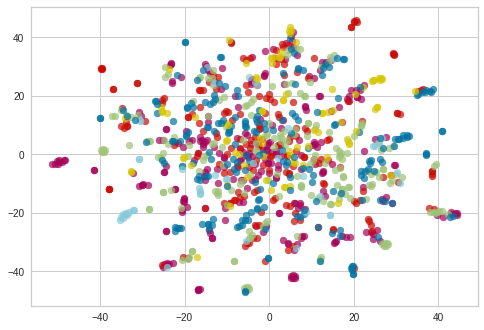

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer

y = np.load('drive/My Drive/facea_seqs_one_frame_to_the_right/Y_label.npy')

# Load the data and create document vectors
tfidf = TfidfVectorizer()

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
y_new = np.argmax(y_test,axis=1)

tsne.fit(X_test[:1000], y_new[:1000])
